In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
columns = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv('magic04.data', names=columns)

In [6]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df['class'] = (df['class'] == 'g').astype(int)

In [9]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

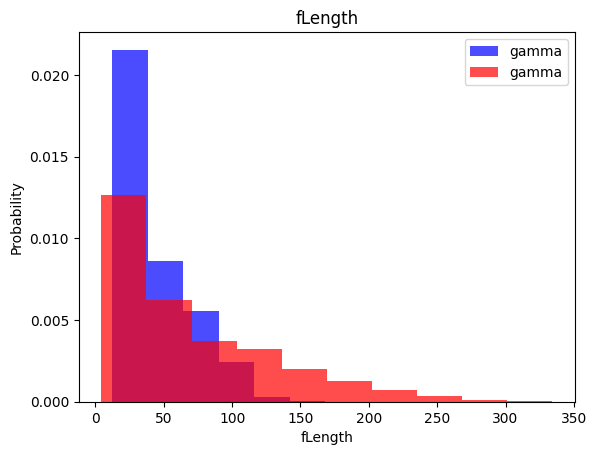

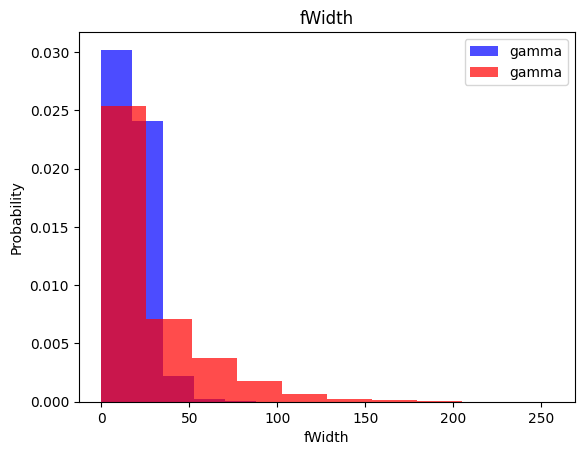

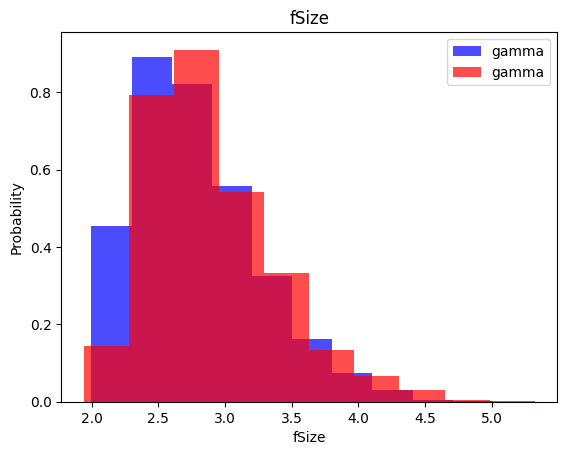

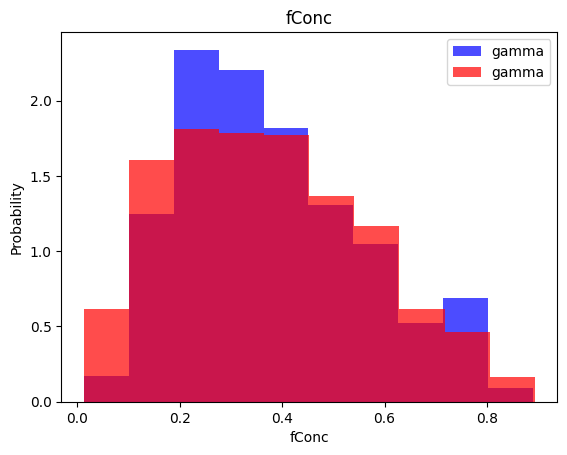

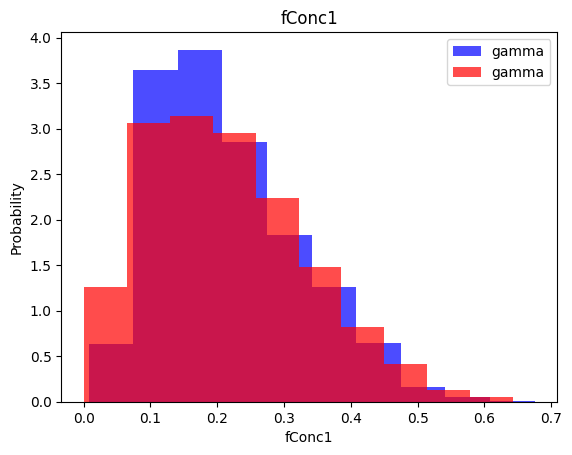

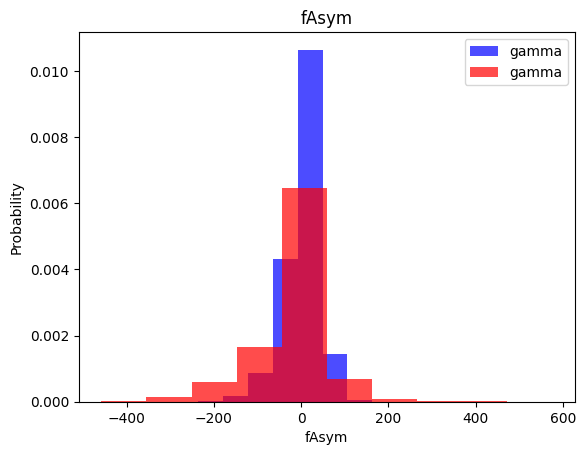

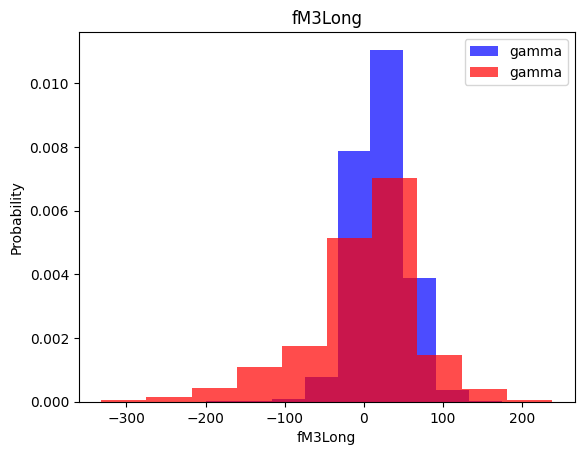

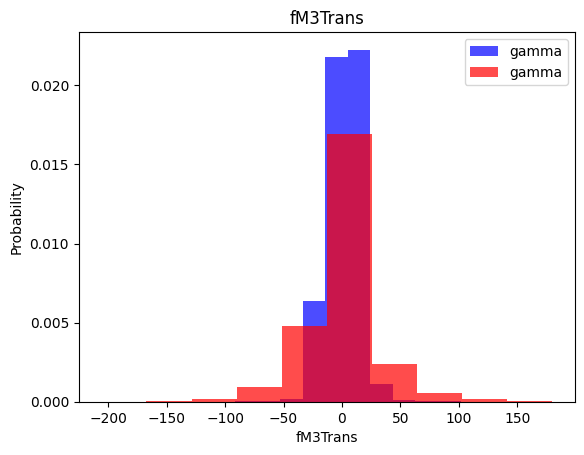

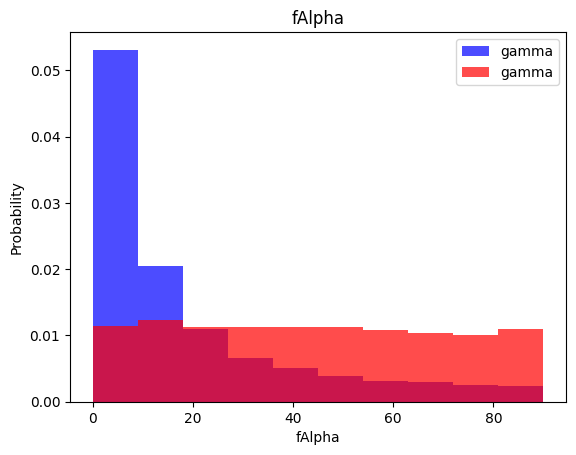

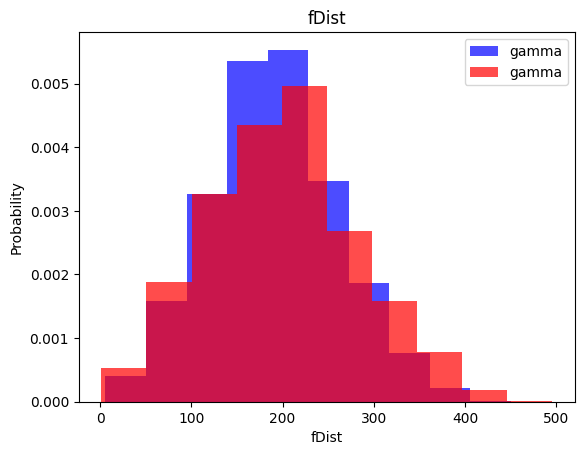

In [10]:
for label in columns[:-1]:
    plt.hist(df[df["class"]==1][label],color = 'blue',label='gamma', alpha =0.7, density=True)
    plt.hist(df[df["class"]==0][label],color = 'red',label='gamma', alpha =0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [11]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)), int(0.8 * len(df))])

In [12]:
type(train)

pandas.core.frame.DataFrame

In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from sklearn.preprocessing import StandardScaler
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [16]:
train , X_train , y_train = scale_dataset(train, oversample = True)
valid , X_valid , y_valid = scale_dataset(valid, oversample = False)
test , X_test , y_test = scale_dataset(test, oversample = False)


In [17]:
print(type(train))

<class 'numpy.ndarray'>


In [18]:
#K nearest neighbour

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn_model.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1311
           1       0.86      0.86      0.86      2493

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [23]:
#Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [26]:
y_pred = nb_model.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.39      0.49      1311
           1       0.74      0.90      0.81      2493

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.72      0.72      0.70      3804



In [28]:
#Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [31]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1311
           1       0.85      0.83      0.84      2493

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [32]:
#Support Vector Machine

In [33]:
from sklearn.svm import SVC

In [34]:
svc_model = LogisticRegression()
svc_model = lg_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1311
           1       0.85      0.83      0.84      2493

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [35]:
#nn model


In [36]:
!pip install tensorflow
import tensorflow as tf


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
 print(tf.__version__)

2.13.0


In [46]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [53]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',metrics=['accuracy'])
    history = nn_model.fit(
    X_train, y_train, epochs = epochs, batch_size=batch_size, validation_split = 0.2, verbose = 0)
    
    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


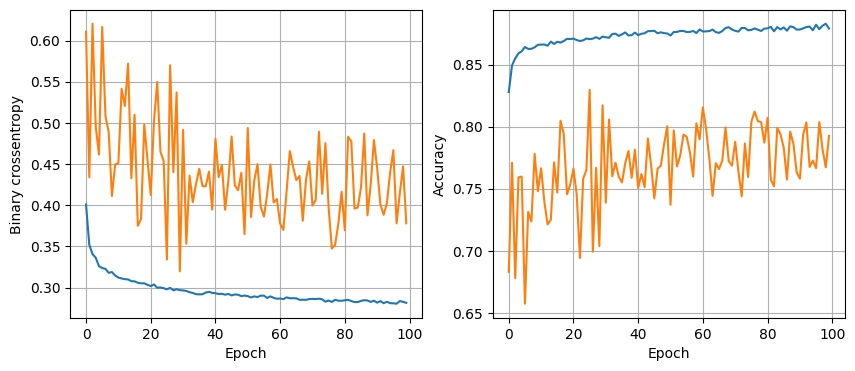

119/119 [==============================] - 0s 3ms/step - loss: 0.3288 - accuracy: 0.8651
16 nodes, dropout 0, lr 0.01, batch size 64


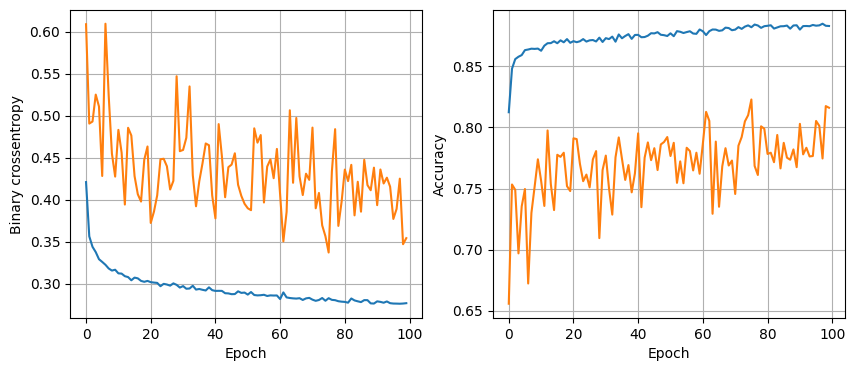

119/119 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8764
16 nodes, dropout 0, lr 0.01, batch size 128


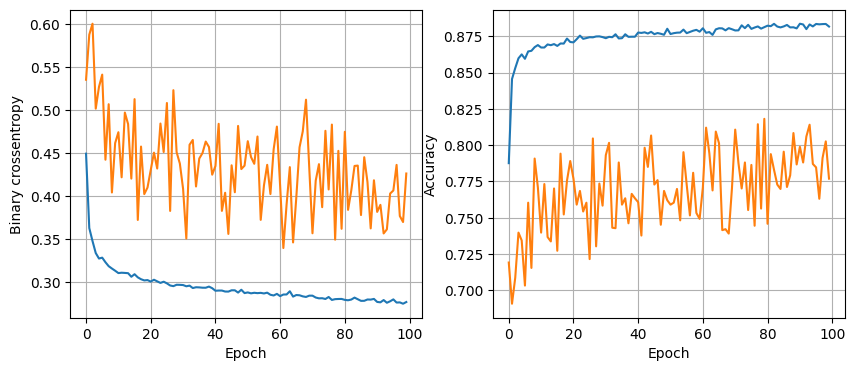

119/119 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 0.8709
16 nodes, dropout 0, lr 0.005, batch size 32


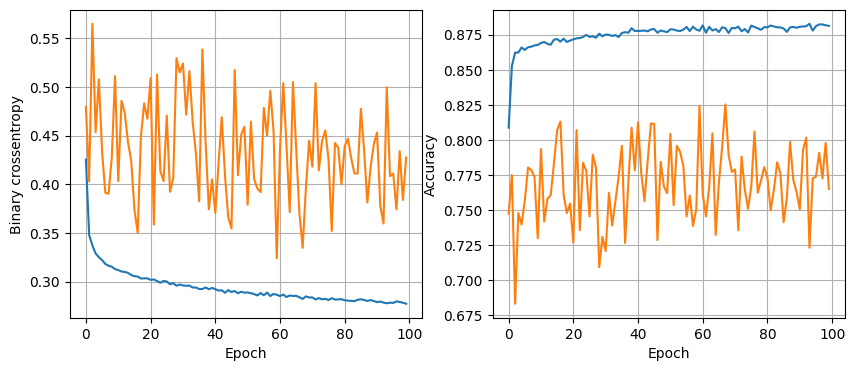

119/119 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8667
16 nodes, dropout 0, lr 0.005, batch size 64


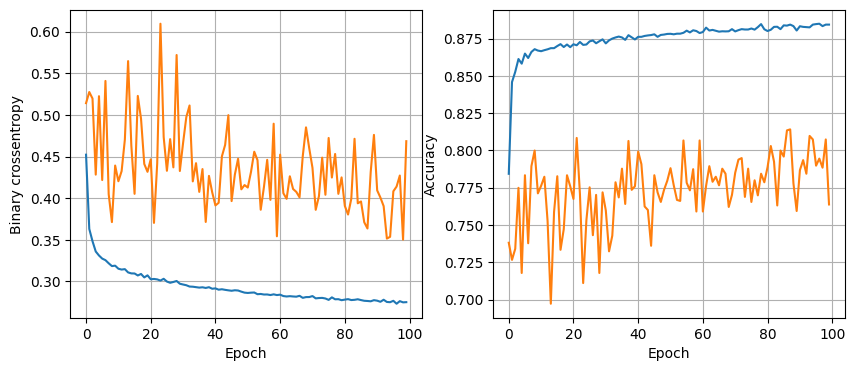

119/119 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8651
16 nodes, dropout 0, lr 0.005, batch size 128


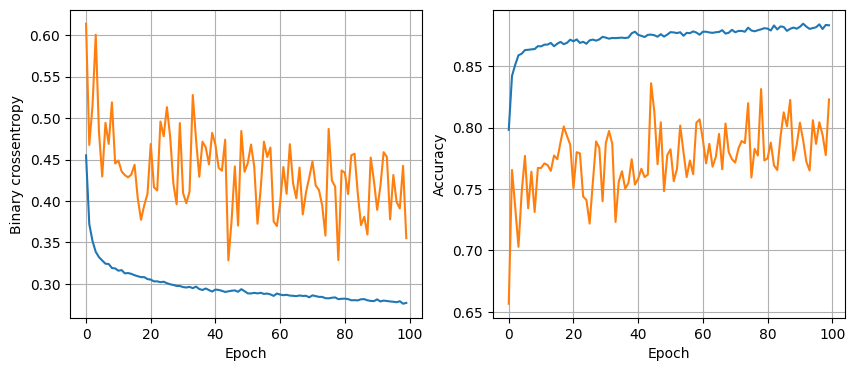

119/119 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.8717
16 nodes, dropout 0, lr 0.001, batch size 32


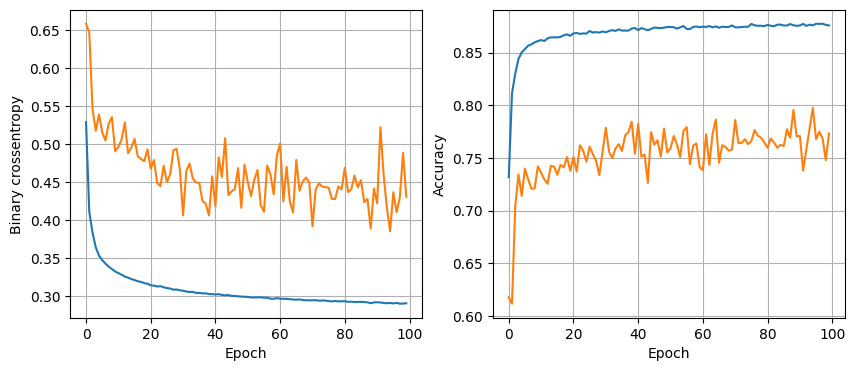

119/119 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.8686
16 nodes, dropout 0, lr 0.001, batch size 64


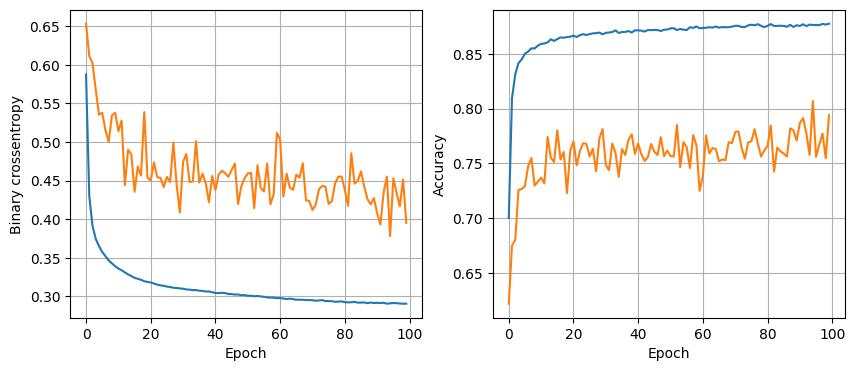

119/119 [==============================] - 0s 1ms/step - loss: 0.3147 - accuracy: 0.8707
16 nodes, dropout 0, lr 0.001, batch size 128


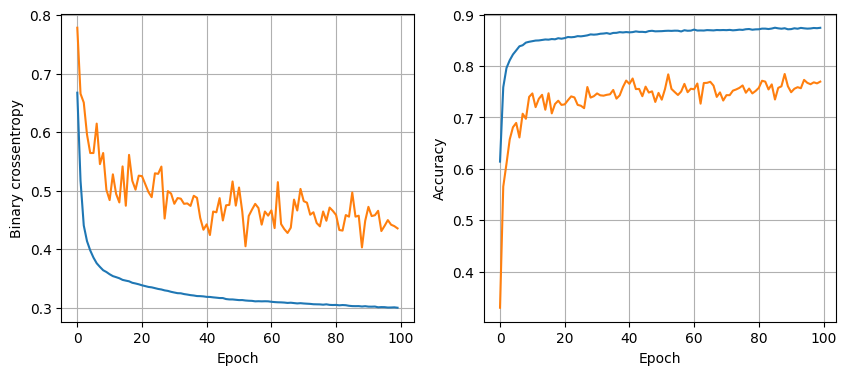

119/119 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.01, batch size 32


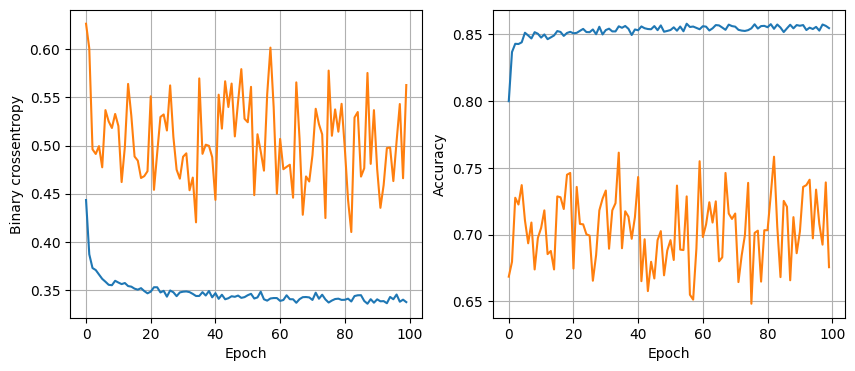

119/119 [==============================] - 0s 1ms/step - loss: 0.3315 - accuracy: 0.8562
16 nodes, dropout 0.2, lr 0.01, batch size 64


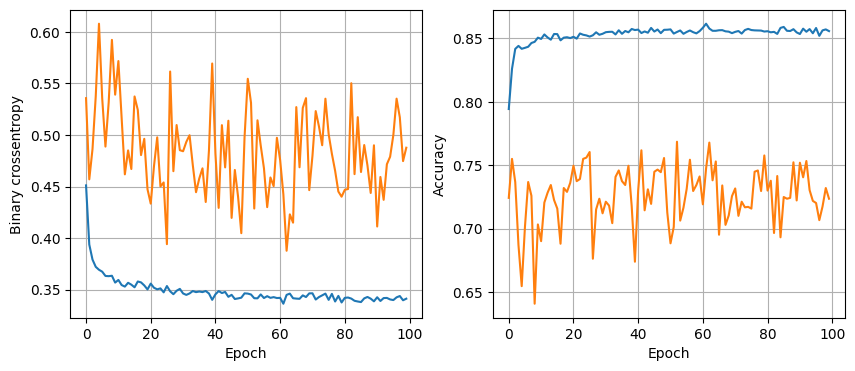

119/119 [==============================] - 0s 1ms/step - loss: 0.3247 - accuracy: 0.8588
16 nodes, dropout 0.2, lr 0.01, batch size 128


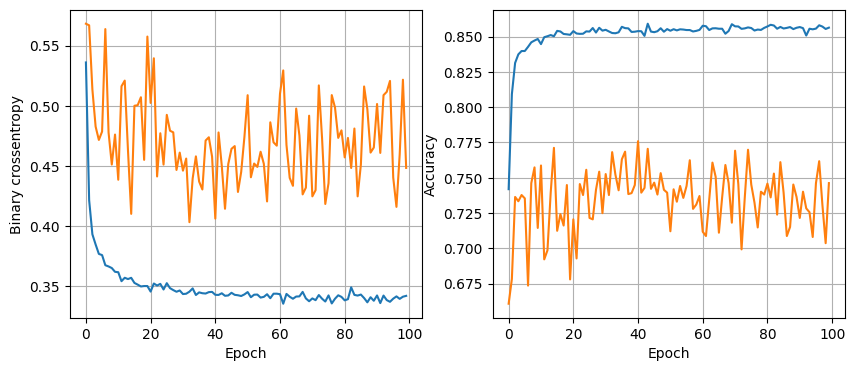

119/119 [==============================] - 0s 1ms/step - loss: 0.3213 - accuracy: 0.8638
16 nodes, dropout 0.2, lr 0.005, batch size 32


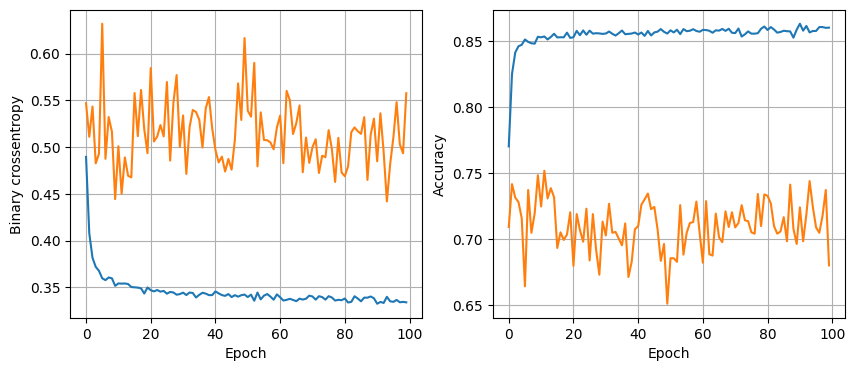

119/119 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8565
16 nodes, dropout 0.2, lr 0.005, batch size 64


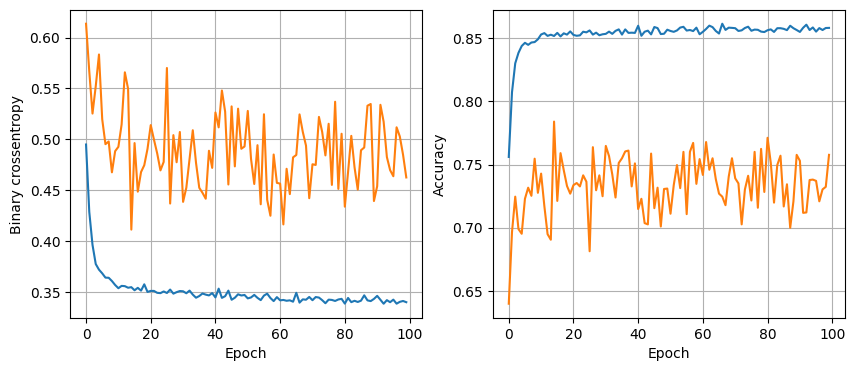

119/119 [==============================] - 0s 1ms/step - loss: 0.3199 - accuracy: 0.8633
16 nodes, dropout 0.2, lr 0.005, batch size 128


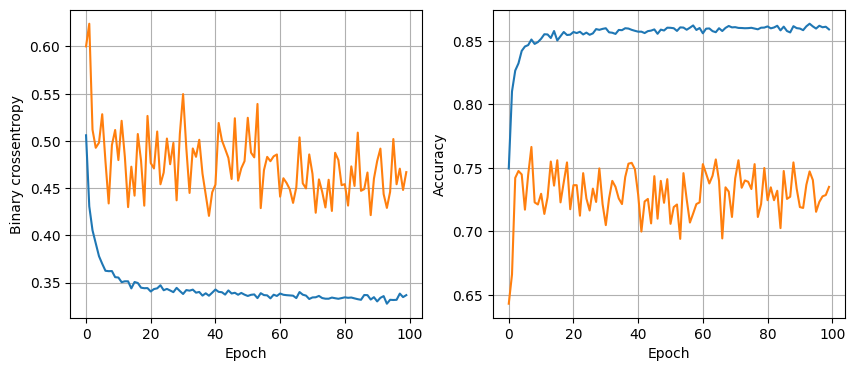

119/119 [==============================] - 0s 1ms/step - loss: 0.3184 - accuracy: 0.8644
16 nodes, dropout 0.2, lr 0.001, batch size 32


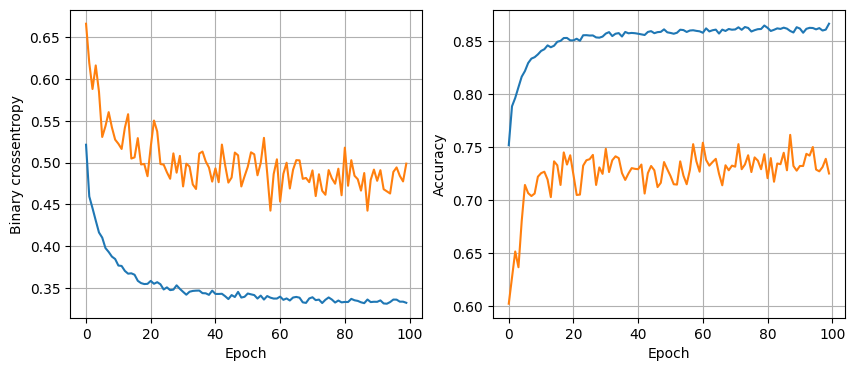

119/119 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8625
16 nodes, dropout 0.2, lr 0.001, batch size 64


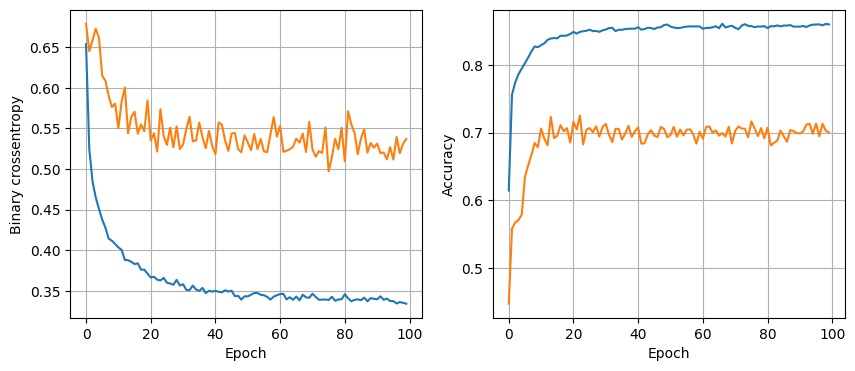

119/119 [==============================] - 0s 1ms/step - loss: 0.3247 - accuracy: 0.8588
16 nodes, dropout 0.2, lr 0.001, batch size 128


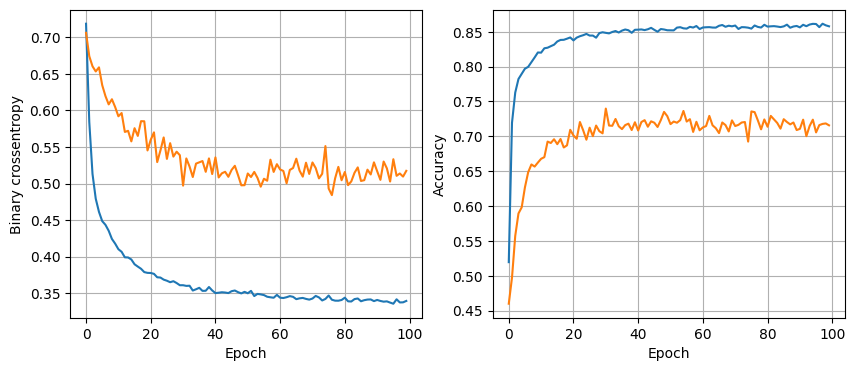

119/119 [==============================] - 0s 1ms/step - loss: 0.3255 - accuracy: 0.8604
32 nodes, dropout 0, lr 0.01, batch size 32


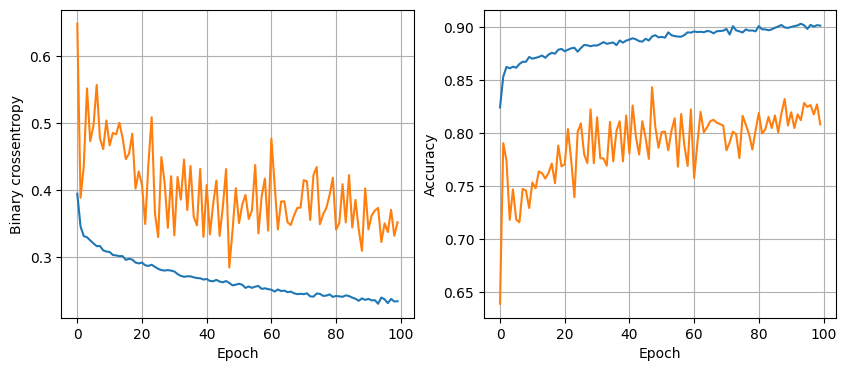

119/119 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8623
32 nodes, dropout 0, lr 0.01, batch size 64


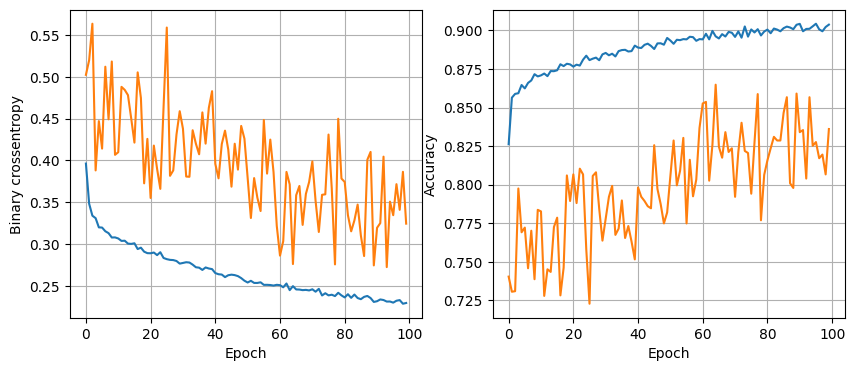

119/119 [==============================] - 0s 1ms/step - loss: 0.3728 - accuracy: 0.8646
32 nodes, dropout 0, lr 0.01, batch size 128


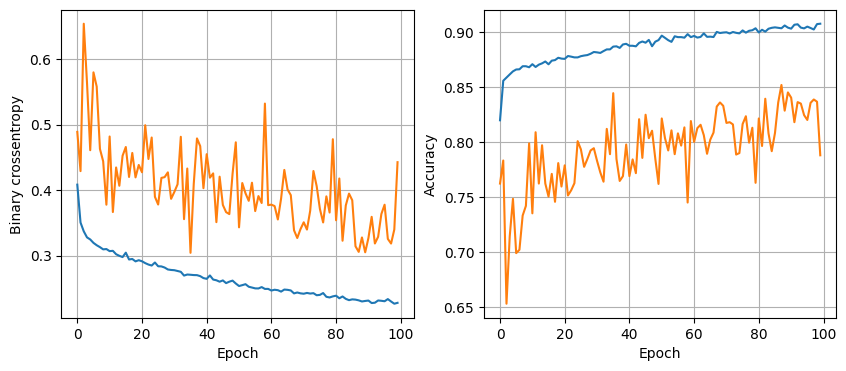

119/119 [==============================] - 0s 1ms/step - loss: 0.3718 - accuracy: 0.8633
32 nodes, dropout 0, lr 0.005, batch size 32


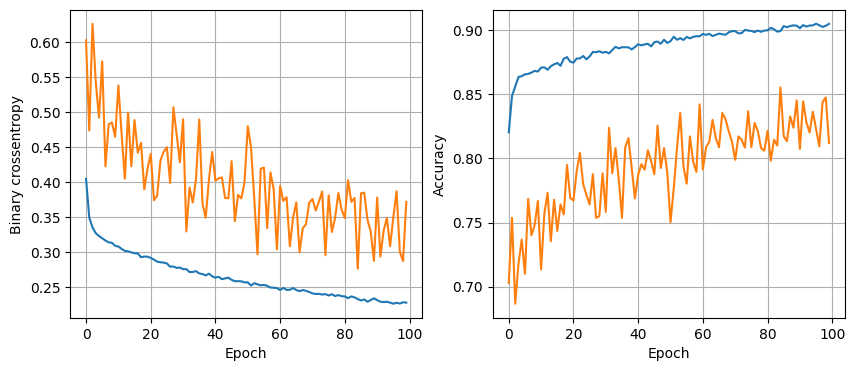

119/119 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8699
32 nodes, dropout 0, lr 0.005, batch size 64


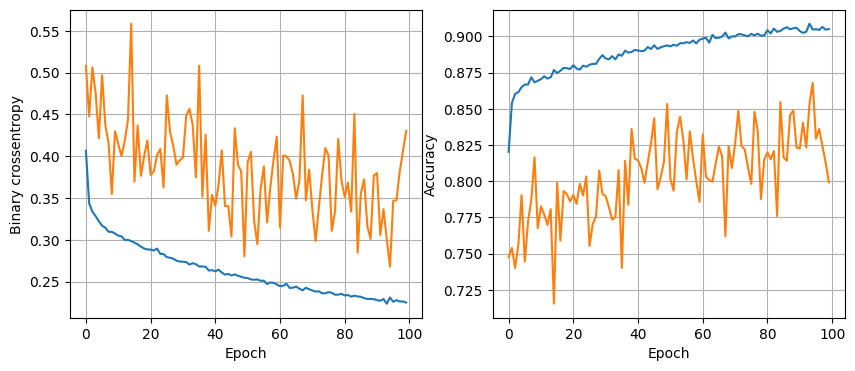

119/119 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.8654
32 nodes, dropout 0, lr 0.005, batch size 128


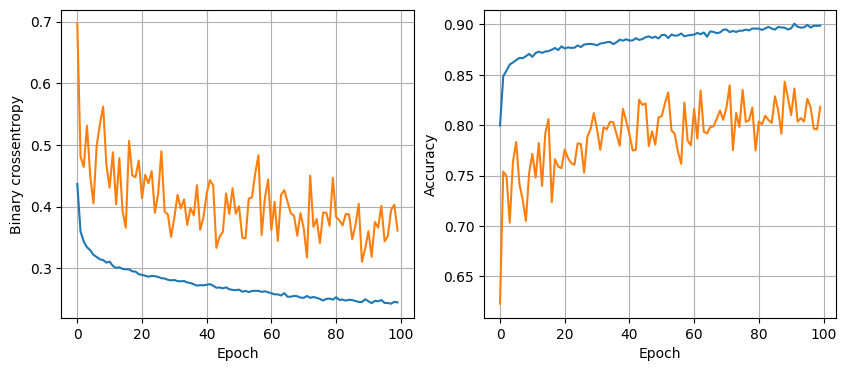

119/119 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.001, batch size 32


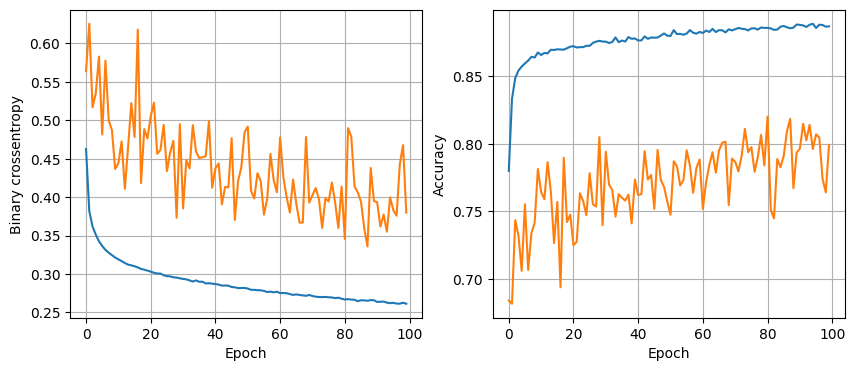

119/119 [==============================] - 0s 1ms/step - loss: 0.3261 - accuracy: 0.8688
32 nodes, dropout 0, lr 0.001, batch size 64


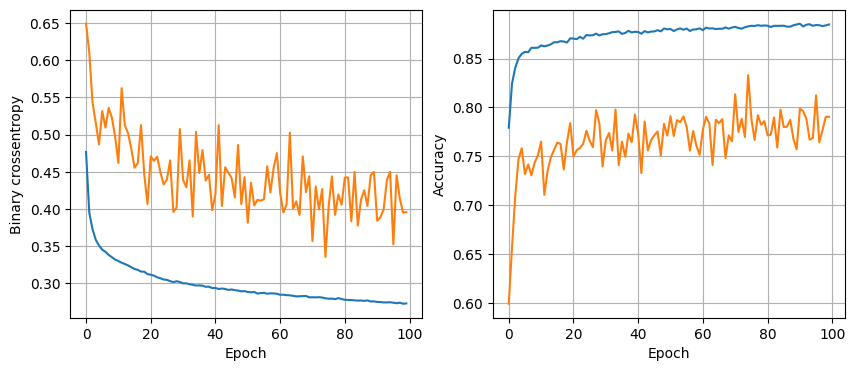

119/119 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8704
32 nodes, dropout 0, lr 0.001, batch size 128


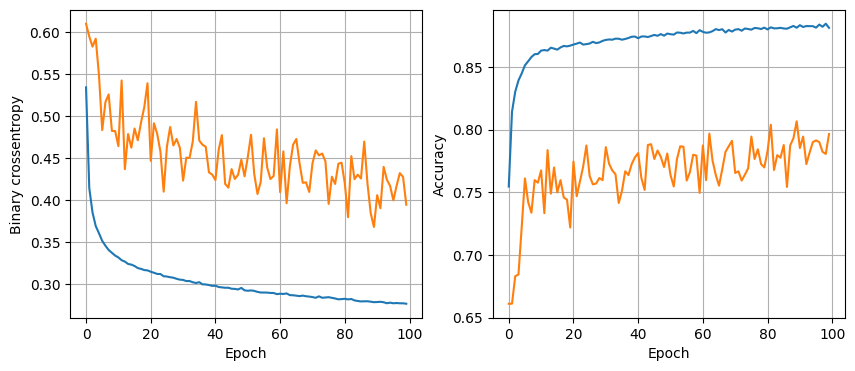

119/119 [==============================] - 0s 1ms/step - loss: 0.3170 - accuracy: 0.8696
32 nodes, dropout 0.2, lr 0.01, batch size 32


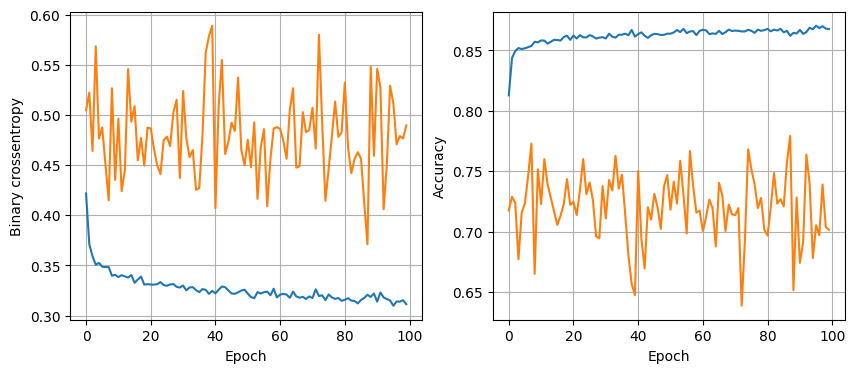

119/119 [==============================] - 0s 1ms/step - loss: 0.3236 - accuracy: 0.8586
32 nodes, dropout 0.2, lr 0.01, batch size 64


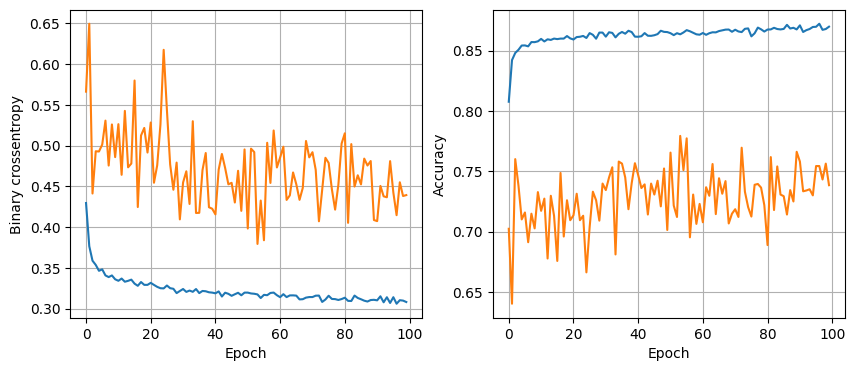

119/119 [==============================] - 0s 1ms/step - loss: 0.3132 - accuracy: 0.8686
32 nodes, dropout 0.2, lr 0.01, batch size 128


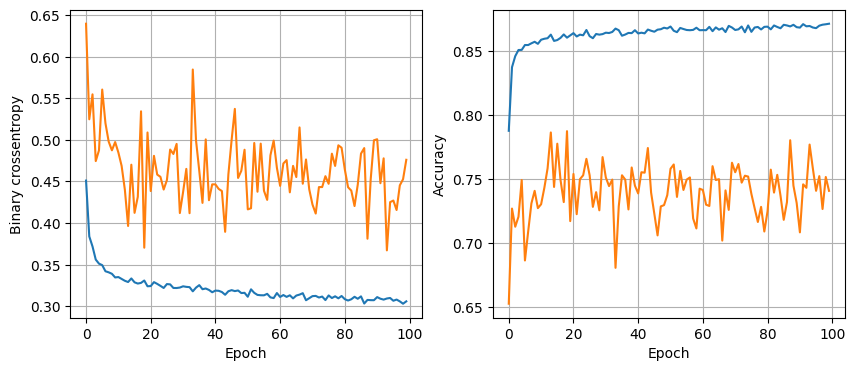

119/119 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8628
32 nodes, dropout 0.2, lr 0.005, batch size 32


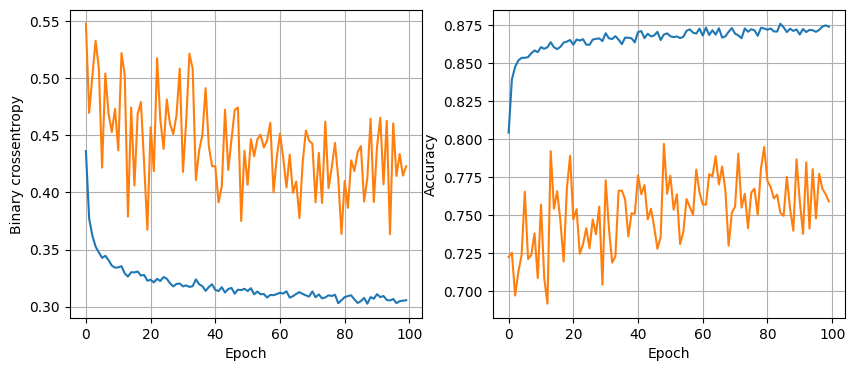

119/119 [==============================] - 0s 1ms/step - loss: 0.3081 - accuracy: 0.8707
32 nodes, dropout 0.2, lr 0.005, batch size 64


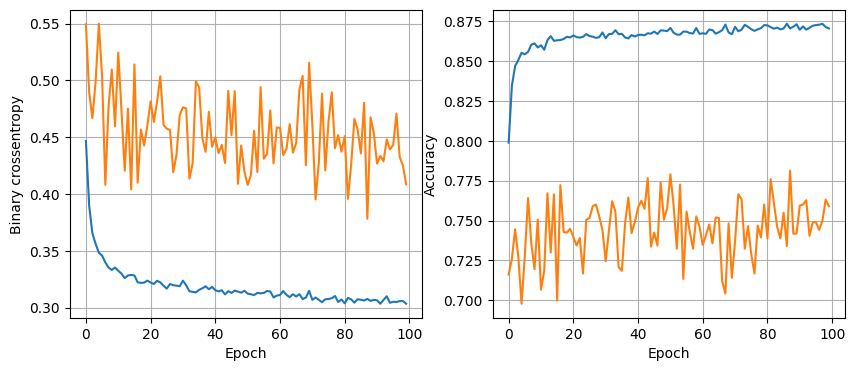

119/119 [==============================] - 0s 1ms/step - loss: 0.3058 - accuracy: 0.8722
32 nodes, dropout 0.2, lr 0.005, batch size 128


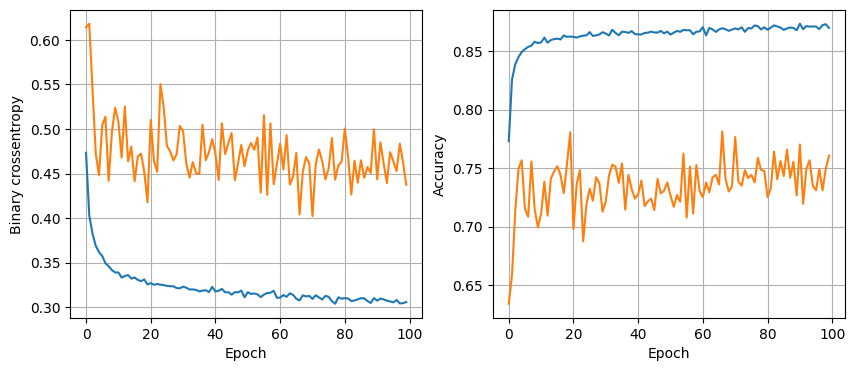

119/119 [==============================] - 1s 4ms/step - loss: 0.3071 - accuracy: 0.8675
32 nodes, dropout 0.2, lr 0.001, batch size 32


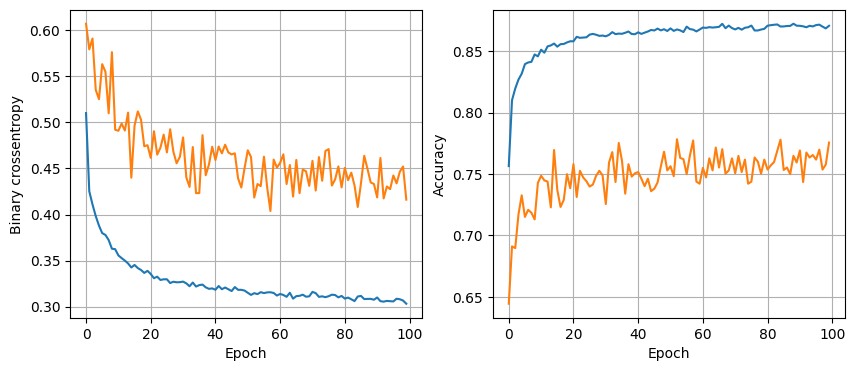

119/119 [==============================] - 0s 1ms/step - loss: 0.3091 - accuracy: 0.8693
32 nodes, dropout 0.2, lr 0.001, batch size 64


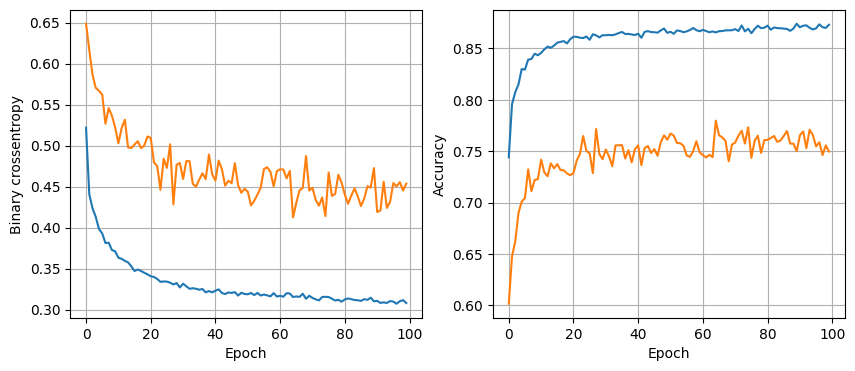

119/119 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8688
32 nodes, dropout 0.2, lr 0.001, batch size 128


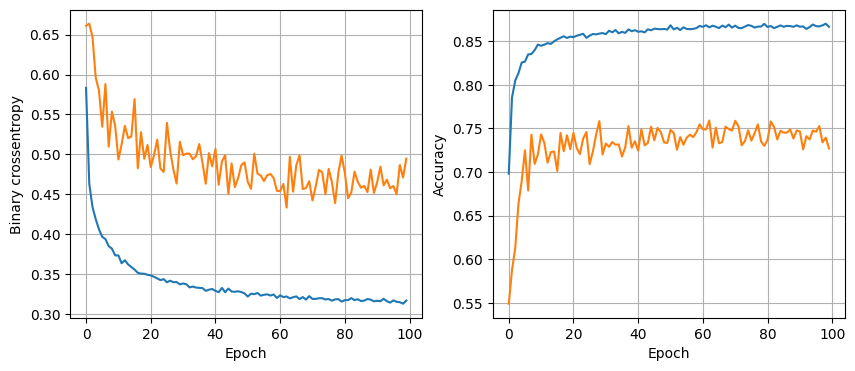

119/119 [==============================] - 0s 1ms/step - loss: 0.3141 - accuracy: 0.8665
64 nodes, dropout 0, lr 0.01, batch size 32


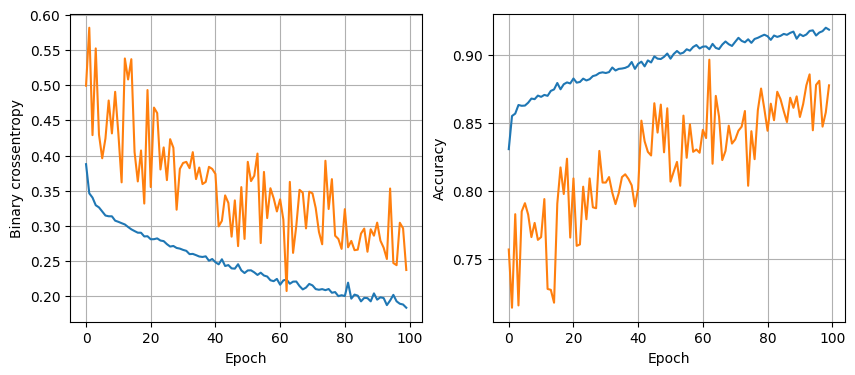

119/119 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.8541
64 nodes, dropout 0, lr 0.01, batch size 64


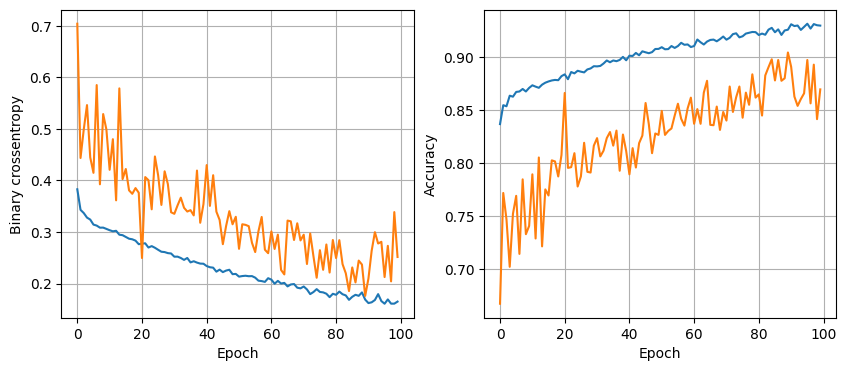

119/119 [==============================] - 0s 1ms/step - loss: 0.5843 - accuracy: 0.8670
64 nodes, dropout 0, lr 0.01, batch size 128


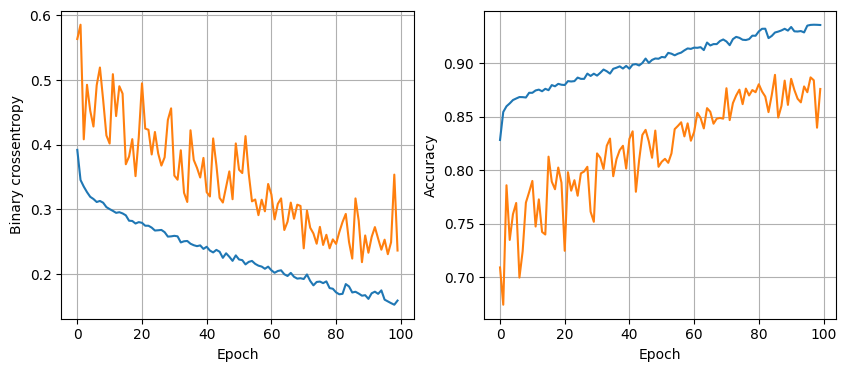

119/119 [==============================] - 0s 1ms/step - loss: 0.5617 - accuracy: 0.8554
64 nodes, dropout 0, lr 0.005, batch size 32


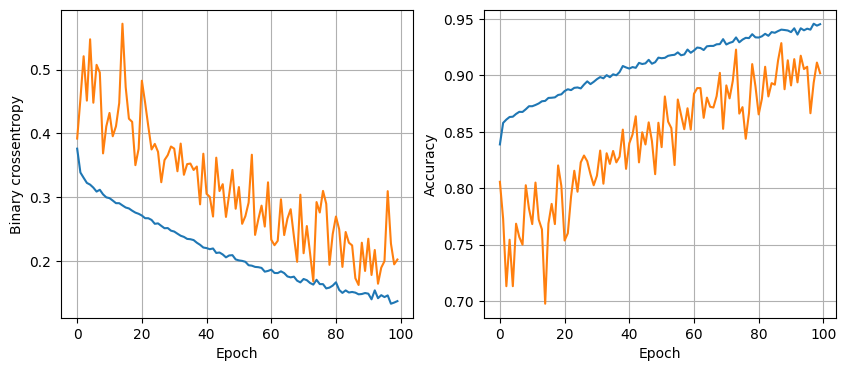

119/119 [==============================] - 0s 1ms/step - loss: 0.6267 - accuracy: 0.8552
64 nodes, dropout 0, lr 0.005, batch size 64


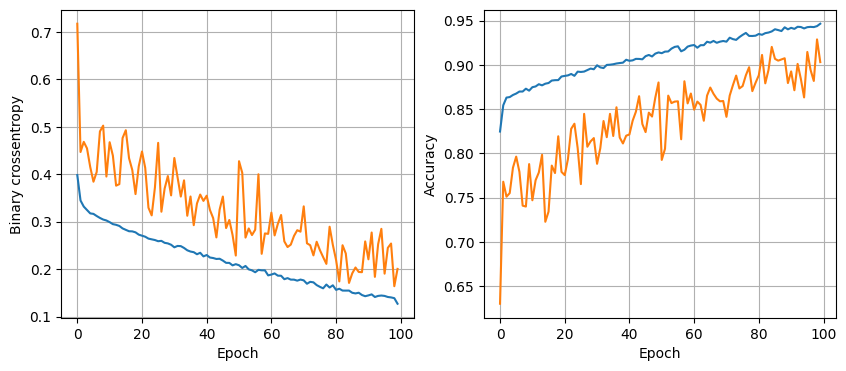

119/119 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.8573
64 nodes, dropout 0, lr 0.005, batch size 128


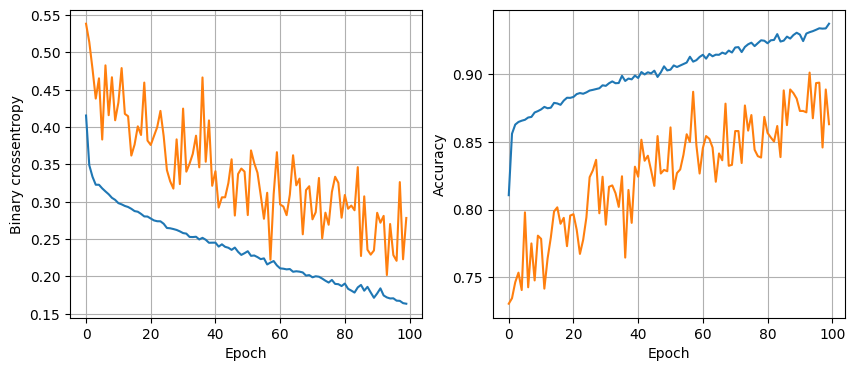

119/119 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.8612
64 nodes, dropout 0, lr 0.001, batch size 32


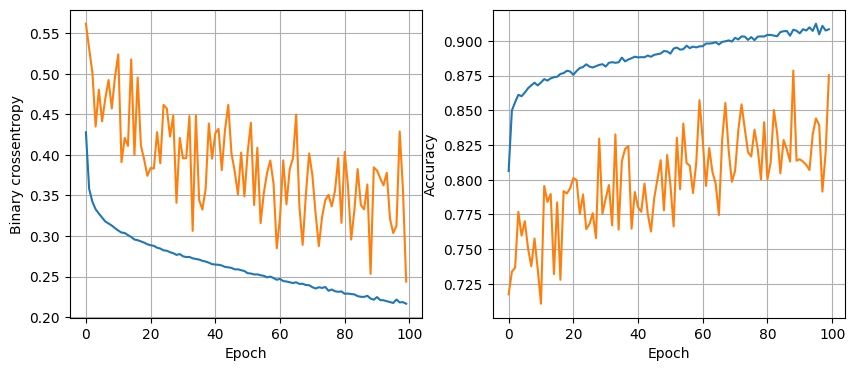

119/119 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.8607
64 nodes, dropout 0, lr 0.001, batch size 64


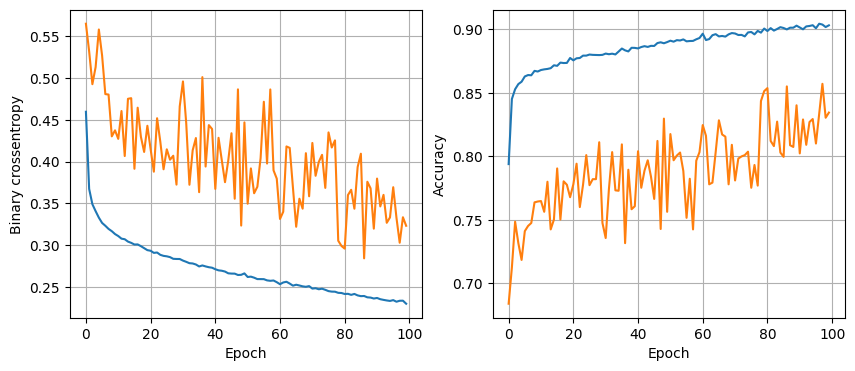

119/119 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8717
64 nodes, dropout 0, lr 0.001, batch size 128


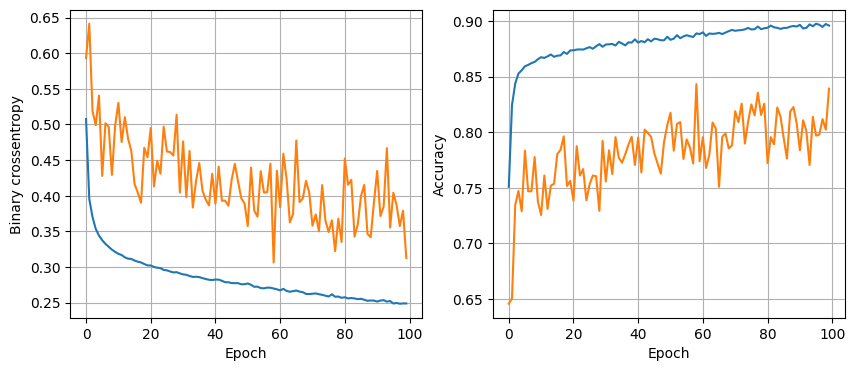

119/119 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8775
64 nodes, dropout 0.2, lr 0.01, batch size 32


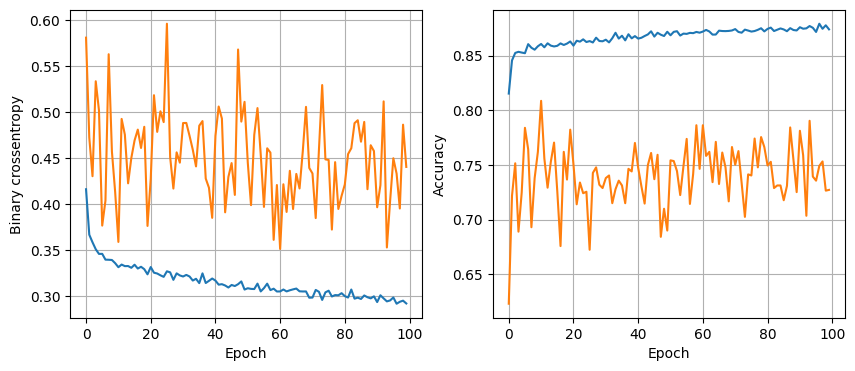

119/119 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8662
64 nodes, dropout 0.2, lr 0.01, batch size 64


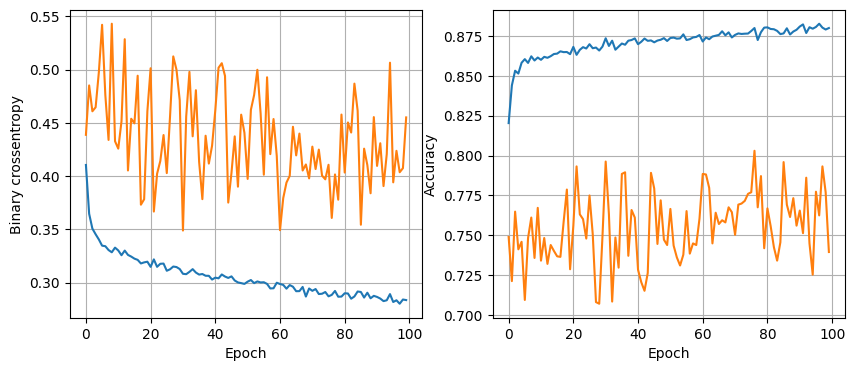

119/119 [==============================] - 0s 1ms/step - loss: 0.3199 - accuracy: 0.8678
64 nodes, dropout 0.2, lr 0.01, batch size 128


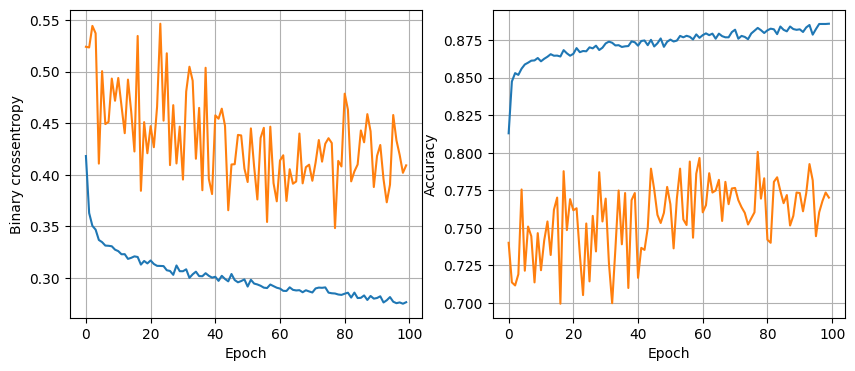

119/119 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.8670
64 nodes, dropout 0.2, lr 0.005, batch size 32


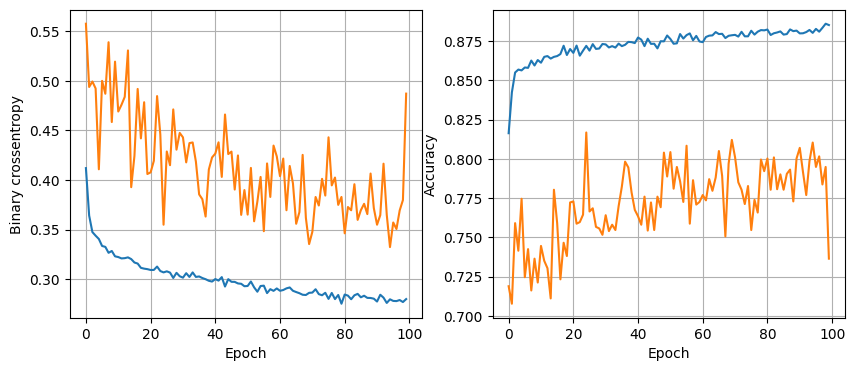

119/119 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8607
64 nodes, dropout 0.2, lr 0.005, batch size 64


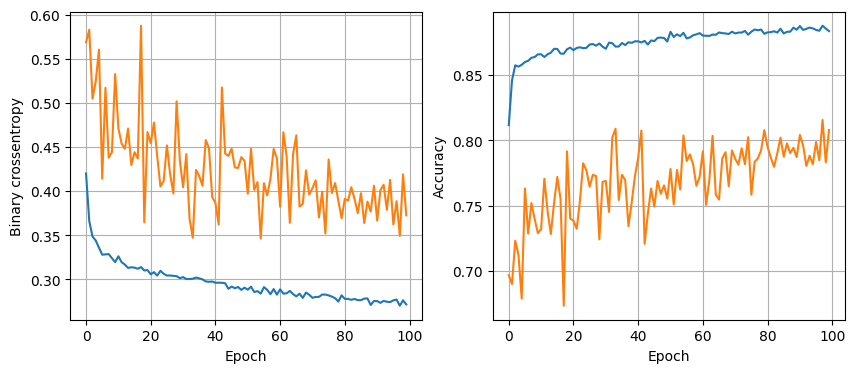

119/119 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8754
64 nodes, dropout 0.2, lr 0.005, batch size 128


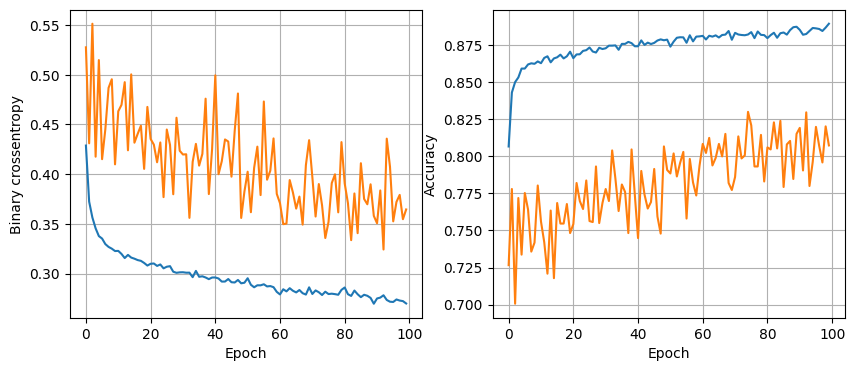

119/119 [==============================] - 0s 1ms/step - loss: 0.3139 - accuracy: 0.8707
64 nodes, dropout 0.2, lr 0.001, batch size 32


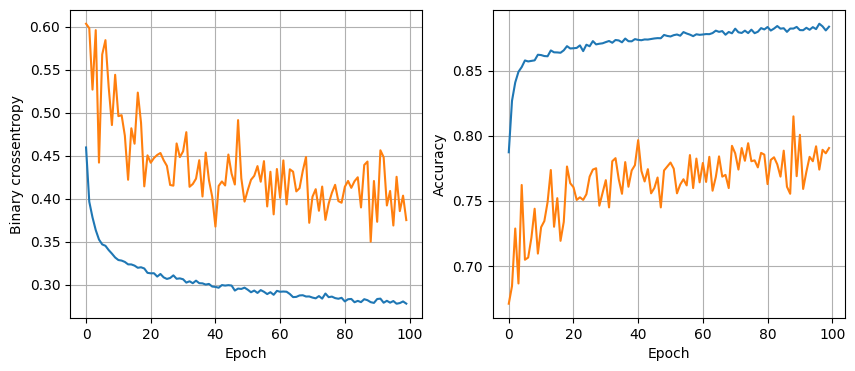

119/119 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8741
64 nodes, dropout 0.2, lr 0.001, batch size 64


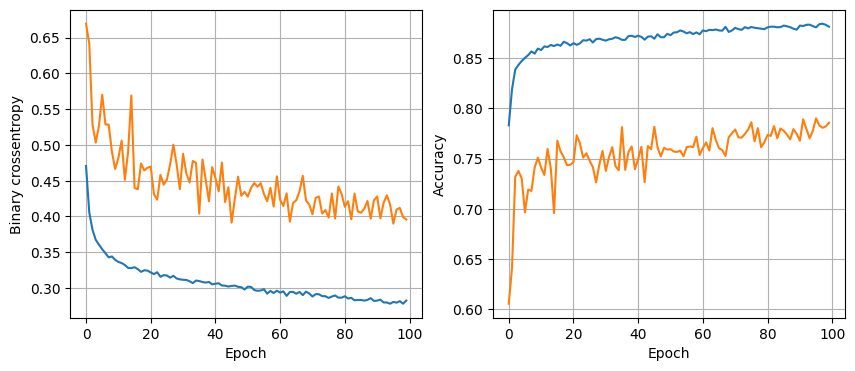

119/119 [==============================] - 0s 1ms/step - loss: 0.2989 - accuracy: 0.8728
64 nodes, dropout 0.2, lr 0.001, batch size 128


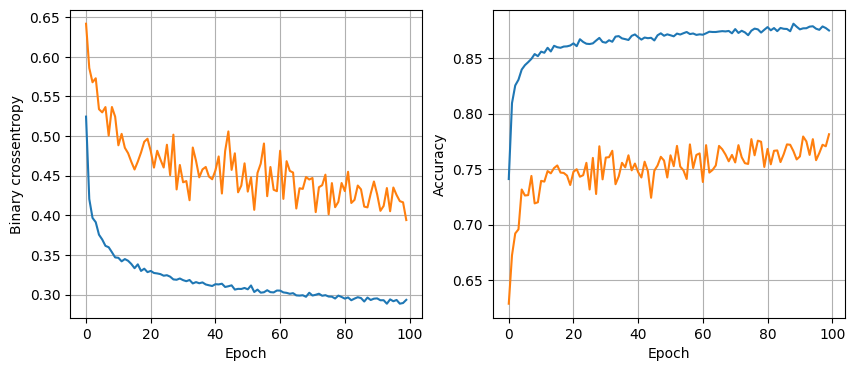

119/119 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8691


In [54]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))